# STEAP

This notebook shows how the figures and tables were made.

#### Imports

In [1]:
# quick/dirty method to allow importing by changing working directory
import os
os.chdir("../")
os.getcwd()

'/home/eerdem/STEAP'

In [2]:
import constants # all constants used here can be found and edited in the constants.py file
import pandas as pd
from pathlib import Path
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import matplotlib.patches as mpatches
import seaborn as sns


# from scripts import convert_output_to_dataframe
from scripts import gene_set_enrichment_analysis
from scripts import calculate_beta_correlation
from scripts import calculate_es_correlation
from scripts import upsetplot
from scripts import circosplot

In [3]:
figure_dir = 'figures_and_tables/'

In [4]:
methods = constants.METHODS
pval_correction = constants.PVAL_CORRECTION
gwas_group_dict = constants.GWAS_GROUP_DICT

In [5]:
df_all = pd.read_hdf('data/enrichment_data.h5', 'df_all')
corr_df = pd.read_hdf('data/correlation_data.h5', 'corr_df')
es_corr_df = pd.read_hdf('data/correlation_data.h5', 'es_corr_df')
display(df_all)
display(corr_df)
display(es_corr_df)

,gwas,specificity_id,annotation,beta,beta_se,pvalue,method,n_methods,pvalue_bonferroni
0,AD_JANSENS2019,Allen_human_LGN,GABAergic.LGN_Inh_CTXN3,-0.174645,0.089013,0.975106,H-MAGMA,3,1.0
1,AD_JANSENS2019,Allen_human_LGN,GABAergic.LGN_Inh_LAMP5,-0.123540,0.071732,0.957472,H-MAGMA,3,1.0
2,AD_JANSENS2019,Allen_human_LGN,GABAergic.LGN_Inh_NTRK1,-0.269440,0.088436,0.998840,H-MAGMA,3,1.0
3,AD_JANSENS2019,Allen_human_LGN,GABAergic.LGN_Inh_TRPC4,-0.246886,0.099982,0.993223,H-MAGMA,3,1.0
4,AD_JANSENS2019,Allen_human_LGN,Glutamatergic.LGN_Exc_BTNL9,-0.421298,0.133637,0.999188,H-MAGMA,3,1.0
...,...,...,...,...,...,...,...,...,...
879625,volume: thalamus,tabula_muris,Tongue.keratinocyte,-0.035636,0.045386,0.783817,MAGMA,3,1.0
879626,volume: thalamus,tabula_muris,Trachea.blood_cell,-0.102483,0.059198,0.958279,MAGMA,3,1.0
879627,volume: thalamus,tabula_muris,Trachea.endothelial_cell,-0.114722,0.055573,0.980498,MAGMA,3,1.0
879628,volume: thalamus,tabula_muris,Trachea.epithelial_cell,-0.102770,0.052743,0.974312,MAGMA,3,1.0


,gwasx,gwasy,corr,pval,method
0,AD_JANSENS2019,ASD_2019,-0.220065,2.278355e-07,H-MAGMA
1,AD_JANSENS2019,BIP_PGC3,-0.122407,4.318468e-03,H-MAGMA
2,AD_JANSENS2019,BMI_GIANT2018,-0.007513,8.614700e-01,H-MAGMA
3,AD_JANSENS2019,DTI AD: ACR,0.247713,5.065423e-09,H-MAGMA
4,AD_JANSENS2019,DTI AD: ALIC,0.234532,3.299649e-08,H-MAGMA
...,...,...,...,...,...
143911,volume: caudate,volume: putamen,0.337825,6.184427e-16,MAGMA
143912,volume: caudate,volume: thalamus,0.351890,3.040520e-17,MAGMA
143913,volume: pallidum,volume: putamen,0.256756,1.313908e-09,MAGMA
143914,volume: pallidum,volume: thalamus,0.310798,1.330849e-13,MAGMA


,celltypex,celltypey,corr,pval,pval_bonferroni
0,"Allen_human_LGN, GABAergic.LGN_Inh_CTXN3","Allen_human_LGN, GABAergic.LGN_Inh_LAMP5",0.227707,6.567906e-15,9.736264e-10
1,"Allen_human_LGN, GABAergic.LGN_Inh_CTXN3","Allen_human_LGN, GABAergic.LGN_Inh_NTRK1",0.494218,8.153577e-111,1.208686e-105
2,"Allen_human_LGN, GABAergic.LGN_Inh_CTXN3","Allen_human_LGN, GABAergic.LGN_Inh_TRPC4",0.293372,7.932429e-24,1.175903e-18
3,"Allen_human_LGN, GABAergic.LGN_Inh_CTXN3","Allen_human_LGN, Glutamatergic.LGN_Exc_BTNL9",0.229996,3.250429e-09,4.818436e-04
4,"Allen_human_LGN, GABAergic.LGN_Inh_CTXN3","Allen_human_LGN, Glutamatergic.LGN_Exc_PRKCG_BCHE",0.350400,1.967979e-23,2.917331e-18
...,...,...,...,...,...
148235,"tabula_muris, Trachea.blood_cell","tabula_muris, Trachea.epithelial_cell",0.117584,1.470170e-02,1.000000e+00
148236,"tabula_muris, Trachea.blood_cell","tabula_muris, Trachea.mesenchymal_cell",0.159096,4.147389e-07,6.148089e-02
148237,"tabula_muris, Trachea.endothelial_cell","tabula_muris, Trachea.epithelial_cell",0.133861,1.003226e-03,1.000000e+00
148238,"tabula_muris, Trachea.endothelial_cell","tabula_muris, Trachea.mesenchymal_cell",0.210935,4.872832e-17,7.223487e-12


In [ ]:
# df_all.to_hdf('data/enrichment_data.h5', key='df_all', mode='w', complevel=9, complib='blosc:zlib')
# corr_df.to_hdf('data/correlation_data.h5', key='corr_df',mode='w', complevel=9, complib='blosc:zlib')
# es_corr_df.to_hdf('data/correlation_data.h5', key='es_corr_df', complevel=9, complib='blosc:zlib')

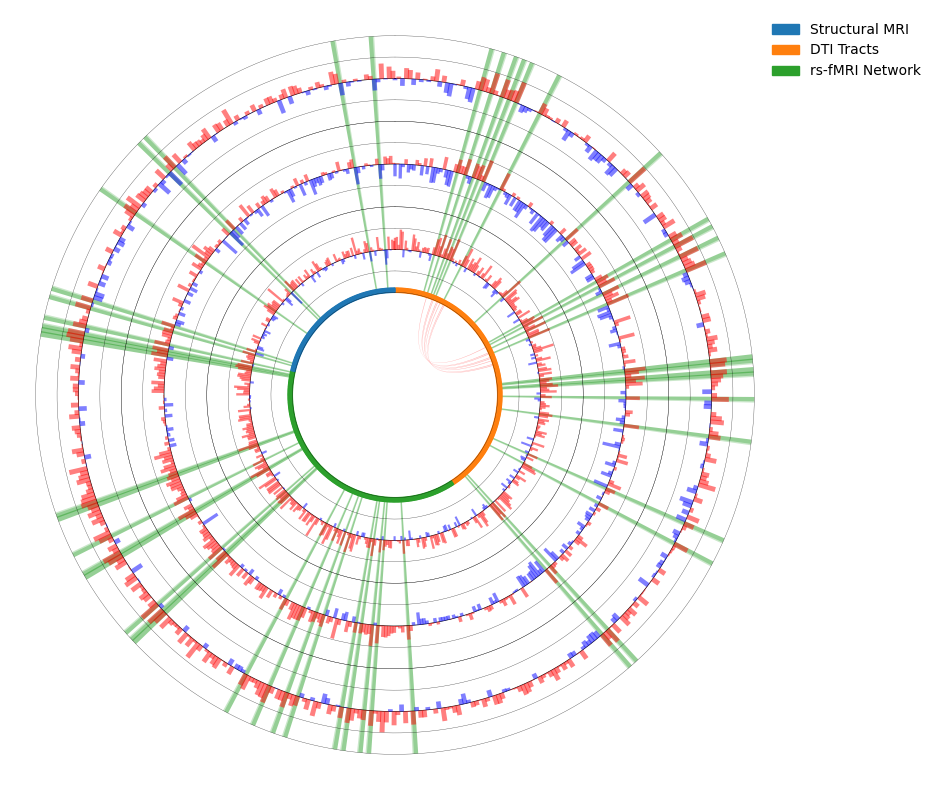

In [10]:
disease_group_dict = {
    
    "Alzheimer's disease":['AD_JANSENS2019'],
    "Bipolar":['BIP_PGC3'],
    "Depression":['PGC_depression2019'],
    "Autism spectrum disorder":['ASD_2019'],
}
name = "Schizophrenia"
gwas_name = 'SCZ_PGC3_2020'
color_bar = 'tab:green'

corrs = corr_df[(corr_df['pval'])<=(0.05/corr_df.shape[0])]['corr']
q = 75
corr_limit = (corrs[corrs<0].quantile(q/100),corrs[corrs>0].quantile(q/100))

circosplot.plot(corr_df, gwas_group_dict,
                gwas_name = gwas_name, #if None it will not plot the outer circles
                corr_limit = (-.99,.99), # for inner chord plot
                ylim = 4500,
                color_bar = color_bar,
                save = False,
#                 filename = f'{figure_dir}circosplot_{name}_quantile{q}.png'
               )


In [ ]:
def bold_significant(row):
    bold = ['']*len(row)
    for i in range(3):
        i+=1
        if row.iloc[-i] <= pthres:
            bold[-i] = 'font-weight: bold'
            bold[-i-3] = 'font-weight: bold'
    return bold

drop_gwas = ['BMI_GIANT2018','SCZ_2014','SCZ_2016','InstantCoffee_2019']
pthres = 0.05 / (corr_df.shape[0]/3)
df = corr_df[
    ~(
        (corr_df['gwasx'].isin(drop_gwas))
        |
        (corr_df['gwasy'].isin(drop_gwas))
    )
#     &
#     (corr_df['pval']<=pthres)   
].pivot_table(index=['gwasx','gwasy'], columns='method').reset_index()
df.columns = ['gwasx','gwasy','corr_H-MAGMA','corr_LDSC','corr_MAGMA','pval_H-MAGMA','pval_LDSC','pval_MAGMA']
df.style.apply(bold_significant, axis=1).to_excel(f'{figure_dir}cell_type_correlation.xlsx')

In [ ]:
import matplotlib.patches as mpatches

color_bar = [
    'tab:green',
    'tab:cyan',
    'tab:orange',
    'tab:olive',
    'tab:purple',    
]
fig, ax = plt.subplots(figsize=(7,7))
ax.set_axis_off()
patches = [mpatches.Patch(color=v, label=k) 
           for k,v in zip(disease_group_dict.keys(),color_bar)]
ax.legend(handles=patches,
          prop={'size': 16},
          bbox_to_anchor=(1.2, 1), loc=1, frameon=False)

In [ ]:
disease_group_dict = {
    "Schizophrenia":['SCZ_PGC3_2020'],
    "Alzheimer's disease":['AD_JANSENS2019'],
    "Bipolar":['BIP_PGC3'],
    "Depression":['PGC_depression2019'],
    "Autism spectrum disorder":['ASD_2019'],
}
color_bar = [
    'tab:green',
    'tab:cyan',
    'tab:orange',
    'tab:olive',
    'tab:purple',    
]

corrs = corr_df[(corr_df['pval'])<=(0.05/corr_df.shape[0])]['corr']
q = 75
corr_limit = (corrs[corrs<0].quantile(q/100),corrs[corrs>0].quantile(q/100))

for c,(name, gwas_name) in zip(color_bar,disease_group_dict.items()):
    gwas_name = gwas_name[0]
    name = name.replace(' ','_').replace("'","")
    circosplot.plot(corr_df, gwas_group_dict,
                    gwas_name = gwas_name, #if None it will not plot the outer circles
                    corr_limit = corr_limit, # for inner chord plot
                    ylim = 4500,
                    color_bar = c,
                    save = True,
                    filename = f'{figure_dir}circosplot_{name}_quantile{q}.png'
                   )


In [ ]:
disease_group_dict = {
    "Schizophrenia":['SCZ_PGC3_2020'],
    "Alzheimer's disease":['AD_JANSENS2019'],
    "Bipolar":['BIP_PGC3'],
    "Depression":['PGC_depression2019'],
    "Autism spectrum disorder":['ASD_2019'],
}
values = "|".join([y for ylist in gwas_group_dict.values() for y in ylist ])
for name,gwas_name in disease_group_dict.items():
    gwas_name = gwas_name[0]
    name = name.replace(' ','_').replace("'",'')
    exc_df = corr_df[
        (
            (
            (corr_df['gwasx'].str.contains(gwas_name))
                &
            (corr_df['gwasy'].str.contains(values))
            )
        |
            (
            (corr_df['gwasy'].str.contains(gwas_name))
                &
            (corr_df['gwasx'].str.contains(values))
            )
        )
        &
        (corr_df['pval'] <= (0.05/(corr_df.shape[0]/3))) 
    ].pivot(index=['gwasx','gwasy'], columns='method').dropna().drop(columns='pval').reset_index()
    exc_df.columns = ['gwasx','gwasy','corr_H-MAGMA','corr_LDSC','corr_MAGMA']
    exc_df['mean'] = exc_df.iloc[:,2:].mean(axis=1)
    exc_df.sort_values('mean', ascending=False, inplace=True)
    exc_df.drop(columns='mean', inplace=True)

    exc_df['gwasy'],exc_df['gwasx'] = np.where(exc_df['gwasy']==gwas_name,
                                               (exc_df['gwasx'],exc_df['gwasy']),
                                               (exc_df['gwasy'],exc_df['gwasx'])
                                              ) 
    exc_df.to_excel(f'{figure_dir}sign_corr_{name}.xlsx', index=False)

#     break


In [ ]:
# group_dict = {
#     'Structural MRI': ['volume', 'thickness', 'area'],
# #     'DTI Tracts': ['DTI'],
#     'rs-fMRI Network': ['Net']
# }
a = 'volume|thickness|area'
b = 'DTI'
c = 'Net'
# values = "|".join([v for vlist in group_dict.values() for v in vlist])
corr_df[
    (((corr_df['gwasx'].str.contains(a)) 
    &
    (corr_df['gwasy'].str.contains(b+'|'+c)))
    |
     ((corr_df['gwasy'].str.contains(a)) 
    &
    (corr_df['gwasx'].str.contains(b+'|'+c)))
    |
    ((corr_df['gwasx'].str.contains(b)) 
    &
    (corr_df['gwasy'].str.contains(a+'|'+c)))
     |
     ((corr_df['gwasy'].str.contains(b)) 
    &
    (corr_df['gwasx'].str.contains(a+'|'+c)))
    |
    ((corr_df['gwasx'].str.contains(c)) 
    &
    (corr_df['gwasy'].str.contains(b+'|'+a)))
     |
    ((corr_df['gwasy'].str.contains(c)) 
    &
    (corr_df['gwasx'].str.contains(b+'|'+a)))
    )
    &
    (corr_df['pval'] <= (0.05/(corr_df.shape[0]/3))) 
].groupby(['gwasx','gwasy']).mean().reset_index()\
.sort_values('corr', ascending=False)
# .tail(50)


In [ ]:
corrs = corr_df[(corr_df['pval'])<=(0.05/corr_df.shape[0])]['corr']
for q in [25,50,75,95]:
    corr_limit = (corrs[corrs<0].quantile(q/100),corrs[corrs>0].quantile(q/100))

    circosplot.plot(corr_df, gwas_group_dict,
                    gwas_name = None, # if None it will not plot the outer circles
                    corr_limit = corr_limit, # for inner chord plot (only significant corr will be shown either way)
                    ylim = 1250,
                    save = True,
                    filename = f'{figure_dir}circosplot_quantile{q}.png'
                   )

## Figure 1

In [ ]:
# venn diagram of shared significant annotations between methods
plt.style.use('default')

df_3m = df_all[(df_all['n_methods']==3)& # only get if analysed in all 3 methods
               (df_all[f'pvalue_{pval_correction}']<=0.05)] # only significant
df_3m = df_3m.groupby(['gwas','specificity_id','annotation'])['method'].agg(list).reset_index()
df_3m = df_3m['method'].value_counts().reset_index()
for m in methods:
    df_3m[m] = df_3m['index'].apply(lambda x : m in x)
df_3m.drop(columns='index', inplace=True)
# this list needs this specific order for the venn subsets
true_false_list = [
    (True,False,False),
    (False,True,False),
    (True,True,False),
    (False,False,True),
    (True,False,True),
    (False,True,True),
    (True,True,True)
]
venn_values = []
for a,b,c in true_false_list:
    venn_values.append(
        df_3m[
            (df_3m[methods[0]]==a)&
            (df_3m[methods[1]]==b)&
            (df_3m[methods[2]]==c)
        ]['method'].values[0]
    )

v = venn3(subsets = venn_values, 
          set_labels = (methods))
# change the colors...
# v.get_patch_by_id('100').set_color('#4A148C')
# v.get_patch_by_id('110').set_color('#9C27B0')
# v.get_patch_by_id('010').set_color('#CE93D8')
# v.get_patch_by_id('001').set_color('#9C27B0')
# v.get_patch_by_id('011').set_color('#4A148C')
# v.get_patch_by_id('111').set_color('#')
plt.savefig(f"{figure_dir}venn_diagram.png", dpi=200, bbox_inches='tight')
plt.show()

## Figure 2

In [ ]:
upsetplot.plot_upset(df_all,
                     gwas_group_dict,
                     sign_threshold=len(methods)-1, # only use cell-types significant in >2 methods
                     element_size=56,
                     save=True, filename=f"{figure_dir}upsetplot_main.png")

upsetplot.get_shared_celltypes(df_all,
                               gwas_group_dict,
                               sign_threshold=len(methods)-1,
                               save_to_excel=True, filename=f"{figure_dir}upsetplot_main.xlsx")

In [ ]:
gwas_group_dict['Schizophrenia'] = ['SCZ_PGC3']

In [ ]:
upsetplot.plot_upset(df_all,
                     gwas_group_dict,
                     sign_threshold=len(methods)-1, # only use cell-types significant in >2 methods
                     element_size=56,
                     save=True, filename=f"{figure_dir}upsetplot_main_scz.png")

upsetplot.get_shared_celltypes(df_all,
                               gwas_group_dict,
                               sign_threshold=len(methods)-1,
                               save_to_excel=True, filename=f"{figure_dir}upsetplot_main_scz.xlsx")

In [ ]:
disease_group_dict = {
    "Schizophrenia":['SCZ_PGC3_2020'],
    "Alzheimer's disease":['AD_JANSENS2019'],
    "Bipolar":['BIP_PGC3'],
    "Depression":['PGC_depression2019'],
    "Autism spectrum disorder":['ASD_2019'],
}

upsetplot.plot_upset(df_all,
                     disease_group_dict,
                     sign_threshold=len(methods)-1, # only use cell-types significant in >2 methods
                     element_size=56,
                     save=True, filename=f"{figure_dir}upsetplot_disease.png")

upsetplot.get_shared_celltypes(df_all,
                               disease_group_dict,
                               sign_threshold=len(methods)-1,
                               save_to_excel=True, filename=f"{figure_dir}upsetplot_disease.xlsx")

## Figure 3

In [ ]:
mri_group_dict = {
    'Volume' : ['volume'],
    'Surface Area' : ['surface area'],
    'Thickness' : ['thickness']
}
upsetplot.plot_upset(df_all, 
                     mri_group_dict,
                     sign_threshold=len(methods)-1, # only use cell-types significant in >2 methods
                     element_size=70,
                     save=True, filename=f"{figure_dir}upsetplot_structural_mri.png"
                    )

upsetplot.get_shared_celltypes(df_all,
                               mri_group_dict,
                               sign_threshold=len(methods)-1,
                               save_to_excel=True, filename=f"{figure_dir}upsetplot_structural_mri.xlsx")

## Figure 4

In [ ]:
dti_group_dict = {
    'FA' : ['DTI FA'],
    'MD' : ['DTI MD'],
    'AD' : ['DTI AD'],
    'RD' : ['DTI RD'],
    'MO' : ['DTI MO'],
#     'PC1' : ['DTI PC1'],
#     'PC2' : ['DTI PC2'],
#     'PC3' : ['DTI PC3'],
#     'PC4' : ['DTI PC4'],
#     'PC5' : ['DTI PC5'], 
}
upsetplot.plot_upset(df_all, 
                     dti_group_dict,
                     sign_threshold=len(methods)-1, # only use cell-types significant in >2 methods
                     element_size=70, sort_by='degree',
                     sort_categories_by=None, # None will sort based on the key order in the group_dict
                     save=True, filename=f"{figure_dir}upsetplot_dti.png"
                    )

upsetplot.get_shared_celltypes(df_all,
                               dti_group_dict,
                               sign_threshold=len(methods)-1,
                               save_to_excel=True, filename=f"{figure_dir}upsetplot_dti.xlsx")

## Figure 5

In [ ]:
dti_group_dict = {
    'FA' : ['DTI FA'],
    'MD' : ['DTI MD'],
    'AD' : ['DTI AD'],
    'RD' : ['DTI RD'],
    'MO' : ['DTI MO'],
    'PC1' : ['DTI PC1'],
    'PC2' : ['DTI PC2'],
    'PC3' : ['DTI PC3'],
    'PC4' : ['DTI PC4'],
    'PC5' : ['DTI PC5'], 
}
upsetplot.plot_upset(df_all, 
                     dti_group_dict,
                     sign_threshold=len(methods)-1, # only use cell-types significant in >2 methods
                     element_size=70, sort_by='degree',
                     sort_categories_by=None, # None will sort based on the key order in the group_dict
                     save=True, filename=f"{figure_dir}upsetplot_dti_w_pc.png"
                    )

upsetplot.get_shared_celltypes(df_all,
                               dti_group_dict,
                               sign_threshold=len(methods)-1,
                               save_to_excel=True, filename=f"{figure_dir}upsetplot_dti_w_pc.xlsx")

## Figure 6

In [ ]:
fmri_group_dict = {
    'Node': ['Node'],
    'Pair': ['Pair'],
    'Edge': ['Edge']
}
upsetplot.plot_upset(df_all, 
                     fmri_group_dict,
                     sign_threshold=len(methods)-1, # only use cell-types significant in >2 methods
                     element_size=70, sort_by='degree',
                     sort_categories_by=None, # None will sort based on the key order in the group_dict
                     save=True, filename=f"{figure_dir}upsetplot_fmri.png"
                    )

upsetplot.get_shared_celltypes(df_all,
                               fmri_group_dict,
                               sign_threshold=len(methods)-1,
                               save_to_excel=True, filename=f"{figure_dir}upsetplot_fmri.xlsx")

## Figure 7

In [ ]:
disease_mousebrain_meta = {
    "Schizophrenia":['SCZ_PGC3'],
    "Bipolar":['BIP'],
    "Depression":['depression'],
}

plt.style.use('seaborn')
def explode_column(df, column, split_str=','):
    df = df.set_index(
            df.drop([column],axis=1).columns.to_list()
        )[[column]].apply(lambda x: x.str.split(',').explode()).reset_index()
    df[column] = df[column].str.strip()
    return df

ylab = ["Class", "Developmental_compartment", "Neurotransmitter","Region"]
heights = [3,3,4,9]

#use mousebrain metadata
file = f"{figure_dir}mousebrain_celltype_metadata.csv"
mb_metadata_df = pd.read_csv(file)
mb_metadata_df['Neurotransmitter'].replace("(\w+) (\(\w+),\s*(\w+\))",r"\1 \2), \1 (\3",
                                        regex=True, inplace=True) #to fix wrong explode
colors = ['tab:green','tab:red','tab:olive']
for (gwas_name, gwas),c in zip(disease_mousebrain_meta.items(),colors):
    gwas = gwas[0]
    mb_metadata_copy = mb_metadata_df.copy()
    mb_metadata_copy['Type'] = 'All'
    df_gwas = df_all[(df_all['gwas'].str.contains(gwas))
                    &
                     (df_all['specificity_id']=='mousebrain')
                     &
                     (df_all[f"pvalue_{pval_correction}"]<=0.05)
                    ]

    df_gwas = df_gwas.groupby(['specificity_id','annotation']).size().reset_index().rename(columns={0:'N_methods'})
    annot_list = df_gwas[df_gwas['N_methods']>=len(methods)-1]['annotation'].to_list()
    mb_metadata_copy.loc[mb_metadata_copy['ClusterName'].isin(annot_list), 'Type'] = gwas

    fig = plt.figure(figsize=(8,8))
    ax_position = [321,323,325,122]
    for pos,y in zip(ax_position,ylab):
        ax = fig.add_subplot(pos)
        df = explode_column(mb_metadata_copy,y)
        df[[y,'Type']].groupby([y,'Type']).size().reset_index()\
        .pivot_table(values=0, index=y, columns='Type').sort_values(y, ascending=False).plot.barh(
            stacked=True, legend=False, ax=ax,
            color=['tab:blue',c]
        )
        ax.set_ylabel('')
        ax.set_title(y.replace('_',' '))
    # plt.suptitle(gwas)
    plt.legend(['__',f"{gwas_name}"])
    fig.text(0.5, -0.0, 'Count', ha='center')
    plt.tight_layout()
    plt.savefig(f"{figure_dir}mousebrain_{gwas_name}.png", dpi=200, bbox_inches='tight')
    plt.show()
#     break

## Figure 8

In [ ]:
gwas_group_dict = {
    'Structural_MRI':['volume','area','thickness'],
#     'DTI_tracts':['DTI'],
#     'rsfMRI':['Net'],
#     'Schizophrenia': ['SCZ_PGC3_2020'],
#     "Alzheimer's disease":['AD_JANS'],
#     "Bipolar":['BIP'],
#     "Depression":['depression'],
#     "Autism spectrum disorder":['ASD'],
}
for name,keywords in gwas_group_dict.items():
    gsea_dict = gene_set_enrichment_analysis.gsea(
        df_all,
        {name:keywords},
        rank=5 # rank=None, analyze all celltypes
    ) 
    gsea_summary_df = gene_set_enrichment_analysis.summarize_gsea(
        gsea_dict,
        correct_pval=True, # Bonferroni correction for N_celltypes
        min_count=1, # don't save terms only found in min_count celltypes
        save_to_excel=False,
        filename=f'gsea/summaries/gsea_{name}_summary.xlsx',    
    )
#     break

In [ ]:
gsea_summary_df

## FIgure 9

In [ ]:
# genetic correlation on a subset of phenotypes was performed using ldsc
genetic_correlation_dir = f"{figure_dir}/genetic_correlation_out/"
columns = ['p1','p2','rg','se','z','p','h2_obs','h2_obs_se','h2_int','h2_int_se','gcov_int','gcov_int_se']
data = []
for file in Path(genetic_correlation_dir).iterdir():
    with open(file,'r') as f:
        lines = f.readlines()
        for linenumber,line in enumerate(lines):
            if line.startswith('p1'):
                d = (lines[linenumber+1]).strip().split()
                d[0] = d[0].split('/')[-1].split('.')[0]
                d[1] = d[1].split('/')[-1].split('.')[0]
                data.append(d)
                break
df = pd.DataFrame(data, columns=columns).replace('NA',np.nan)
df = df.apply(pd.to_numeric, errors='ignore')
display(df)

In [ ]:
# the cell type correlation uses different names for the same phenotypes
# so first we will convert these names so we can compare them
phenotypes_cort = {
                "Frontal": ["superiorfrontal", "rostralmiddlefrontal", "caudalmiddlefrontal", "parsopercularis", "parstriangularis","parsorbitalis", "lateralorbitofrontal", "medialorbitofrontal", "precentral", "paracentral", "frontalpole"],
                "Temporal": ["superiortemporal", "middletemporal", "inferiortemporal", "bankssts", "fusiform", "transversetemporal","entorhinal", "temporalpole", "parahippocampal"],
                "Parietal": ["superiorparietal", "inferiorparietal", "supramarginal", "postcentral", "precuneus"  ],
                "Occipital": ["lateraloccipital", "lingual", "cuneus", "pericalcarine"],
                "Cingulate": ["rostralanteriorcingulate", "caudalanteriorcingulate", "posteriorcingulate", "isthmuscingulate"],
                "Insula": ["insula"],  
                "Cortex": ['cortex']
                }
model_cort = {
        "model1a": "surface area",
        "model1b": "cortical thickness (adjusted)",
        "model1c": "cortical thickness",
        "model1d": "volume" 
        }
inv_map_pheno = {v:k for k,v_list in phenotypes_cort.items() for v in v_list}
p_df = pd.concat([df['p1'],df['p2']])
df_cort = p_df[p_df.str.contains('model1\w_\w+')].copy()
keys_cortical = df_cort.unique().tolist()
df_cort = df_cort.str.extract('(model1\w)_(\w+)_\w+')
df_cort[0] = df_cort[0].apply(lambda x: model_cort[x])
df_cort[2] = df_cort[1].apply(lambda x: inv_map_pheno[x])
values_cortical = (df_cort[0]+': '+df_cort[2]+'.'+df_cort[1]).values.tolist()
cortical_dict = {k:v for k,v in zip(keys_cortical,values_cortical)}

df_dti = p_df[p_df.str.contains('dti|fapc')].copy()
keys_dti = df_dti.unique().tolist()
meta_dti = pd.read_csv('gwas/DTI.csv', usecols=[0,1])
meta_dti[['type','pheno']] = meta_dti['assoc_files'].str.extract(r'_(\w+)_(pheno\d+)', expand=True)
df_dti = df_dti.str.extract('ukb_phase1to3_(\w+)_dec21_2019_(\w+)').replace({'fapcs':'fpc','dti441':'mean'})
df_dti = df_dti.merge(meta_dti, right_on=['type','pheno'], left_on=[0,1]).drop_duplicates()
df_dti[['region','param']] = df_dti['phenocode'].str.split('_', expand=True)
values_dti = ('DTI '+df_dti['param']+': '+df_dti['region']).values.tolist()
dti_dict = {k:v for k,v in zip(keys_dti,values_dti)}

df_subcor = p_df[p_df.str.contains('fixed_\w+_MEGAMETA')].copy()
keys_subcortical = df_subcor.unique().tolist()
values_subcortical = ('volume: '+df_subcor.str.extract(r'fixed_(\w+)_MEGAMETA')).values.flatten().tolist()
subcortical_dict = {k:v for k,v in zip(keys_subcortical,values_subcortical)}

hipp_dict = {'ukb_roi_volume_may12_2019_phase1and2_pheno81_allchr_withA2':'volume: Hippocampus.left',
             'ukb_roi_volume_may12_2019_phase1and2_pheno94_allchr_withA2':'volume: Hippocampus.right'
            }

df_rsfmri = p_df[p_df.str.contains('fmri')].copy()
keys_rsfmri = df_rsfmri.unique().tolist()
rsfmri_metafile = "gwas/fMRI.csv"
rsfmri_metadata = pd.read_csv(rsfmri_metafile)
rsfmri_metadata[['type','pheno']] = rsfmri_metadata['assoc_files'].str.extract('fmri_(\w+)_(pheno\d+)', expand=True)
df_rsfmri = df_rsfmri.str.extract('fmri_(\w+)_dec21_2019_(pheno\d+)')
values_rsfmri = df_rsfmri.merge(rsfmri_metadata, left_on=[0,1], right_on=['type','pheno']).drop_duplicates()['phenocode'].values.tolist()
rsfmri_dict = {k:v for k,v in zip(keys_rsfmri,values_rsfmri)}

others_dict = {'ASD_iPSYCH-PGC_ASD_Nov2017':'ASD_2019',
               'PGC_UKB_depression2019':'PGC_depression2019',
               'SCZ_clozuk_pgc2':'SCZ_2016',
               'CHARGE-ENIGMA-HV-METAANALYSIS':'HV_2016'    
}

merged_dict = {**cortical_dict,**dti_dict,**subcortical_dict,**rsfmri_dict,**hipp_dict,**others_dict}

def replace_name(name):
    if name in merged_dict.keys():
        return merged_dict[name]
    else:
        return name
    
df['p1'] = df['p1'].apply(replace_name)
df['p2'] = df['p2'].apply(replace_name)
display(df)

In [ ]:
# check which phenotype has not had their name changed
for key in df['p1'].unique().tolist():
    if key not in merged_dict.values():
        print(key)
# these phenotypes have the same name in the cell type correlation dataframe so no further renaming is needed

In [ ]:
gc_corr_sorted = df[['p1','p2','rg','p']].copy() # genetic correlation
ct_corr_sorted = corr_df.copy() # cell type correlation

# sort the p1/gwasx and p2/gwasy alphabetically so we can easily merge them
gc_corr_sorted[['p1','p2']] = gc_corr_sorted.apply(
    lambda x: sorted([x[0],x[1]]),
    result_type='expand', axis=1
)
ct_corr_sorted[['gwasx','gwasy']] = ct_corr_sorted.apply(
    lambda x: sorted([x[0],x[1]]),
    result_type='expand', axis=1
)

In [ ]:
merged_corr = gc_corr_sorted.merge(ct_corr_sorted, right_on=['gwasx','gwasy'],
                                   left_on=['p1','p2']).drop(columns=['p1','p2'])
display(merged_corr)

In [ ]:
merged_corr.query("(rg<0.1 and rg>-0.1) and (corr<-0.2)").sort_values('corr').head(50)

In [ ]:
corr_df[
    ((corr_df.gwasx.str.contains('epression'))|
            (corr_df.gwasy.str.contains('epression')))&
            ((corr_df.gwasx.str.contains('AD_JANSENS2019'))|
            (corr_df.gwasy.str.contains('AD_JANSENS2019')))
           ]

In [ ]:
plt.style.use('seaborn')
fig, axes = plt.subplots(1,3,figsize=(15,8), sharey=True)
s = 2
alpha = 1
size = 15
color_map = {
    'Not Significant' : '#377eb8',
    'Significant in\nGenetic Correlation' : '#4daf4a',
    'Significant in\nCell Type Correlation' : '#984ea3',
    'Significant in Both' : '#e41a1c'
}
for ax,m in zip(axes.flatten(),methods):
    merged_corr_m = merged_corr[merged_corr['method']==m]
    threshold_gc = 0.05/merged_corr_m.shape[0]
    threshold_ct = threshold_gc
    not_significant = merged_corr_m[(merged_corr_m['p']>threshold_gc)& # gc not sign and
                                ((merged_corr_m['pval']>threshold_ct))] # ct not sign 
    gc_significant = merged_corr_m[(merged_corr_m['p']<=threshold_gc)& # gc sign and
                                   ((merged_corr_m['pval']>threshold_ct))] # ct not sign
    ct_significant = merged_corr_m[(merged_corr_m['p']>threshold_gc)& # gc not sign and
                                   ((merged_corr_m['pval']<=threshold_ct))] # ct sign and
    both_significant = merged_corr_m[(merged_corr_m['p']<=threshold_gc)& # gc sign and
                                     ((merged_corr_m['pval']<=threshold_ct))] # ct sign and
    ax.scatter(not_significant['corr'],not_significant['rg'], color=color_map['Not Significant'],
               alpha=alpha, s=s)
    ax.scatter(gc_significant['corr'],gc_significant['rg'], color=color_map['Significant in\nGenetic Correlation'],
               alpha=alpha, s=s)
    ax.scatter(ct_significant['corr'],ct_significant['rg'], color=color_map['Significant in\nCell Type Correlation'],
               alpha=alpha, s=s)
    ax.scatter(both_significant['corr'],both_significant['rg'], color=color_map['Significant in Both'],
               alpha=alpha, s=s)
    ticks = [-1,-0.5,0,0.5,1]
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks, fontsize=size)  
    ax.set_yticks(ticks)
    ax.set_yticklabels(ticks, fontsize=size)  
    ax.set_xlim(-0.5,1.05)
    ax.set_title(m, size=size)
    ax.axhline(0, color='w', lw=3, ls='-', zorder=0)
    ax.axvline(0, color='w', lw=3, ls='-', zorder=0)
    
    print(f'Significant in genetic correlation only {gc_significant.shape[0]} {m}')
    print(f'Significant in cell type correlation only {ct_significant.shape[0]} {m}')
#     ax.grid()
fig.text(0.5, 0.04, 'Cell Type Correlation', ha='center', size=size)
fig.text(0.06, 0.5, 'Genetic Correlation', va='center', rotation='vertical', size=size)
patches = [mpatches.Patch(color=v, label=k) for k,v in color_map.items()]
fig.legend(handles=patches, bbox_to_anchor=(1.1, .89), loc=1, frameon=False, fontsize=size)
fig.savefig(f"{figure_dir}genetic_corr_vs_celltype_corr.png", dpi=200, bbox_inches='tight')
plt.show()


## Figure 10

In [6]:
def get_ticks(yticks, ax):
    ticks = ['']*len(yticks)
    for group in set(yticks):
        start = False
        end = False
        for i,tick in enumerate(yticks):
            if tick==group and start==False:
                start = i
            if start and tick!=group:
                end = i
                break
        if end:
            ax.axvline(x=end, color='k', lw=0.5)
            ax.axhline(y=end, color='k', lw=0.5)
        if end == False:
            end = i
        mid = int((end+start)/2)   
        ticks[mid] = group
    return ticks

def confidence_interval(data, confidence=0.95):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return (m-h,m+h)

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(1,1, figsize=(5,5))
group_corr_df = corr_df[(corr_df['gwasx'].str.contains(': \w+\.\w+'))& # only get MRI measurement phenotypes
                        (corr_df['gwasy'].str.contains(': \w+\.\w+'))&
                        ~((corr_df['gwasx'].str.contains('Hippocampus'))| # remove hippocampus volume data
                          corr_df['gwasy'].str.contains('Hippocampus'))
                       ] 
all_group_gwas = pd.concat([group_corr_df['gwasx'],group_corr_df['gwasy']]).unique()
diag_df = [[g,g,1,0,m] for g in all_group_gwas for m in methods]
group_corr_df = group_corr_df.append(pd.DataFrame(diag_df, columns=group_corr_df.columns))
for m in ['H-MAGMA']:
    group_corr_df_m = group_corr_df[group_corr_df['method']==m].copy()
    group_corr_df_m = group_corr_df_m.pivot(columns='gwasy', index='gwasx', values='corr').T
    ax.imshow(group_corr_df_m,
              cmap='bwr', vmin=-1, vmax=1
#               cmap='coolwarm', vmin=-1, vmax=1
#               cmap='Reds', vmin=0, vmax=1
             )
    ax.set_title(m)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    yticks = group_corr_df_m.index.str.split(':').str[0].str.split('(').str[0].str.rstrip().str.split(' ').str[-1]
    ticks = get_ticks(yticks,ax)
#     ax.yaxis.tick_right()
    ax.set_yticks(list(range(0,group_corr_df_m.shape[0])))
    ax.set_yticklabels(ticks)
#     ax.xaxis.tick_top()
    ax.set_xticks(list(range(0,group_corr_df_m.shape[0])))
    ax.set_xticklabels(ticks)
#     plt.savefig(f"{figure_dir}heatmap_corr_structural_MRI_{m}.png", dpi=200, bbox_inches='tight')
    plt.show()
# plt.tight_layout()


In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(1,1, figsize=(8,8))
group_corr_df = corr_df[(corr_df['gwasx'].str.contains(': \w+\.\w+'))& # only get MRI measurement phenotypes
                        (corr_df['gwasy'].str.contains(': \w+\.\w+'))&
                        ~((corr_df['gwasx'].str.contains('Hippocampus'))| # remove hippocampus volume data
                          corr_df['gwasy'].str.contains('Hippocampus'))
                       ] 
all_group_gwas = pd.concat([group_corr_df['gwasx'],group_corr_df['gwasy']]).unique()
diag_df = [[g,g,1,0,m] for g in all_group_gwas for m in methods]
group_corr_df = group_corr_df.append(pd.DataFrame(diag_df, columns=group_corr_df.columns))
for m in ['H-MAGMA']:
    group_corr_df_m = group_corr_df[group_corr_df['method']==m].copy()
    pthres = 0.05 / group_corr_df_m.shape[0]
    group_corr_df_m.loc[group_corr_df_m['pval']>pthres, 'corr'] = 0
    annot = group_corr_df_m.pivot(index='gwasx', columns='gwasy', values='pval')
    annot = (annot < pthres).T.replace({True:'*', False:''})
    group_corr_df_m = group_corr_df_m.pivot(columns='gwasy', index='gwasx', values='corr').T
    sns.heatmap(group_corr_df_m,
                vmin=-1, vmax=1,
#                 annot=annot,
#                 fmt = '',
#                 annot_kws={"size": 5, "color":'black'}, 
                cmap='bwr',
                cbar=False,
                ax=ax
                )
    ax.set_title(m)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    yticks = group_corr_df_m.index.str.split(':').str[0].str.split('(').str[0].str.rstrip().str.split(' ').str[-1]
    ticks = get_ticks(yticks,ax)
    ax.set_yticks(list(range(0,group_corr_df_m.shape[0])))
    ax.set_yticklabels(ticks)
    ax.set_xticks(list(range(0,group_corr_df_m.shape[0])))
    ax.set_xticklabels(ticks)
    ax.set_ylabel('')
    ax.set_xlabel('')
    plt.savefig(f"{figure_dir}heatmap_corr_structural_MRI_{m}.png", dpi=200, bbox_inches='tight')
    plt.show()
# plt.tight_layout()


In [ ]:
plt.style.use('default')
fig, axes = plt.subplots(1,3, figsize=(20,6.6667),
                        gridspec_kw = {'wspace':0, 'hspace':0})
group_corr_df = corr_df[(corr_df['gwasx'].str.contains(': \w+\.\w+'))& # only get MRI measurement phenotypes
                        (corr_df['gwasy'].str.contains(': \w+\.\w+'))&
                        ~((corr_df['gwasx'].str.contains('Hippocampus'))| # remove hippocampus volume data
                          corr_df['gwasy'].str.contains('Hippocampus'))
                       ] 
all_group_gwas = pd.concat([group_corr_df['gwasx'],group_corr_df['gwasy']]).unique()
diag_df = [[g,g,1,0,m] for g in all_group_gwas for m in methods]
group_corr_df = group_corr_df.append(pd.DataFrame(diag_df, columns=group_corr_df.columns))
for m,ax in zip(methods,axes.flatten()):    
    group_corr_df_m = group_corr_df[group_corr_df['method']==m].copy()
    pthres = 0.05 / group_corr_df_m.shape[0]
    group_corr_df_m.loc[group_corr_df_m['pval']>pthres, 'corr'] = 0
    annot = group_corr_df_m.pivot(index='gwasx', columns='gwasy', values='pval')
    annot = (annot < pthres).T.replace({True:'*', False:''})
    group_corr_df_m = group_corr_df_m.pivot(columns='gwasy', index='gwasx', values='corr').T
    sns.heatmap(group_corr_df_m,
                vmin=-1, vmax=1,
#                 annot=annot,
#                 fmt = '',
#                 annot_kws={"size": 5, "color":'black'}, 
                cmap='bwr',
                cbar=False,
                ax=ax
                )
    ax.set_title(m)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    yticks = group_corr_df_m.index.str.split(':').str[0].str.split('(').str[0].str.rstrip().str.split(' ').str[-1]
    ticks = get_ticks(yticks,ax)
#     ax.yaxis.tick_right()
    ax.set_yticks(list(range(0,group_corr_df_m.shape[0])))
    ax.set_yticklabels(['']*len(ticks))
#     ax.xaxis.tick_top()
    ax.set_xticks(list(range(0,group_corr_df_m.shape[0])))
    ax.set_xticklabels(ticks)  
    ax.set_ylabel('')
    ax.set_xlabel('')
axes[0].set_yticks(list(range(0,group_corr_df_m.shape[0])))
axes[0].set_yticklabels(ticks)
plt.savefig(f"{figure_dir}heatmap_corr_structural_MRI.png", dpi=200, bbox_inches='tight')
plt.show()
# plt.tight_layout()


In [ ]:
group_corr_df = corr_df[(corr_df['gwasx'].str.contains(': \w+\.\w+'))& # only get MRI measurement phenotypes
                          (corr_df['gwasy'].str.contains(': \w+\.\w+'))&
                          ~((corr_df['gwasx'].str.contains('Hippocampus'))| # remove hippocampus volume data
                           corr_df['gwasy'].str.contains('Hippocampus'))
                         ] 
group_corr_df = group_corr_df[
    # only get identical measuements
    (group_corr_df['gwasx'].str.split(':').str[-1])==(group_corr_df['gwasy'].str.split(':').str[-1]) 
]
group_corr_df['gwasx'] = group_corr_df['gwasx'].str.split(':').str[0]
group_corr_df['gwasy'] = group_corr_df['gwasy'].str.split(':').str[0]
# 95 CI
group_corr_df.groupby(['gwasx','gwasy']).agg(
    {'corr':['mean',confidence_interval]}
).reset_index().sort_values(('corr','mean'), ascending=False)


In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(1,1, figsize=(8,8))
group_corr_df = corr_df[(corr_df['gwasx'].str.contains('DTI'))& 
                        (corr_df['gwasy'].str.contains('DTI'))]
all_group_gwas = pd.concat([group_corr_df['gwasx'],group_corr_df['gwasy']]).unique()
diag_df = [[g,g,1,0,m] for g in all_group_gwas for m in methods]
group_corr_df = group_corr_df.append(pd.DataFrame(diag_df, columns=group_corr_df.columns))
for m in ['H-MAGMA']:
    group_corr_df_m = group_corr_df[group_corr_df['method']==m].copy()
    pthres = 0.05 / group_corr_df_m.shape[0]
    group_corr_df_m.loc[group_corr_df_m['pval']>pthres, 'corr'] = 0
    annot = group_corr_df_m.pivot(index='gwasx', columns='gwasy', values='pval')
    annot = (annot < pthres).T.replace({True:'*', False:''})
    group_corr_df_m = group_corr_df_m.pivot(columns='gwasy', index='gwasx', values='corr').T
    sns.heatmap(group_corr_df_m,
                vmin=-1, vmax=1,
#                 annot=annot,
#                 fmt = '',
#                 annot_kws={"size": 3, "color":'black'}, 
                cmap='bwr',
                cbar=False,
                ax=ax
                )
    ax.set_title(m)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    yticks = group_corr_df_m.index.str.split(':').str[0].str.split('(').str[0].str.rstrip().str.split(' ').str[-1]
    ticks = get_ticks(yticks,ax)
    ax.set_yticks(list(range(0,group_corr_df_m.shape[0])))
    ax.set_yticklabels(ticks)
    ax.set_xticks(list(range(0,group_corr_df_m.shape[0])))
    ax.set_xticklabels(ticks)
    ax.set_ylabel('')
    ax.set_xlabel('')
# ax.set_yticks(list(range(0,group_corr_df_m.shape[0])))
# ax.set_yticklabels(ticks, size=9)
plt.savefig(f"{figure_dir}heatmap_corr_DTI_tracts_{m}.png", dpi=200, bbox_inches='tight')
plt.show()
# plt.tight_layout()

In [ ]:
plt.style.use('default')
fig, axes = plt.subplots(1,3, figsize=(20,6.6667),
                        gridspec_kw = {'wspace':0, 'hspace':0})
group_corr_df = corr_df[(corr_df['gwasx'].str.contains('DTI'))& 
                        (corr_df['gwasy'].str.contains('DTI'))]
all_group_gwas = pd.concat([group_corr_df['gwasx'],group_corr_df['gwasy']]).unique()
diag_df = [[g,g,1,0,m] for g in all_group_gwas for m in methods]
group_corr_df = group_corr_df.append(pd.DataFrame(diag_df, columns=group_corr_df.columns))
for m,ax in zip(methods,axes.flatten()):    
    group_corr_df_m = group_corr_df[group_corr_df['method']==m].copy()
    pthres = 0.05 / group_corr_df_m.shape[0]
    group_corr_df_m.loc[group_corr_df_m['pval']>pthres, 'corr'] = 0
    annot = group_corr_df_m.pivot(index='gwasx', columns='gwasy', values='pval')
    annot = (annot < pthres).T.replace({True:'*', False:''})
    group_corr_df_m = group_corr_df_m.pivot(columns='gwasy', index='gwasx', values='corr').T
    sns.heatmap(group_corr_df_m,
                vmin=-1, vmax=1,
#                 annot=annot,
#                 fmt = '',
#                 annot_kws={"size": 3, "color":'black'}, 
                cmap='bwr',
                cbar=False,
                ax=ax
                )
    ax.set_title(m)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    yticks = group_corr_df_m.index.str.split(':').str[0].str.split('(').str[0].str.rstrip().str.split(' ').str[-1]
    ticks = get_ticks(yticks,ax)
#     ax.yaxis.tick_right()
    ax.set_yticks(list(range(0,group_corr_df_m.shape[0])))
    ax.set_yticklabels(['']*len(ticks))
#     ax.xaxis.tick_top()
    ax.set_xticks(list(range(0,group_corr_df_m.shape[0])))
    ax.set_xticklabels(ticks)  
    ax.set_ylabel('')
    ax.set_xlabel('')
axes[0].set_yticks(list(range(0,group_corr_df_m.shape[0])))
axes[0].set_yticklabels(ticks)
plt.savefig(f"{figure_dir}heatmap_corr_DTI_tracts.png", dpi=200, bbox_inches='tight')
plt.show()
# plt.tight_layout()

In [ ]:
group_corr_df = corr_df[(corr_df['gwasx'].str.contains('DTI'))& 
                        (corr_df['gwasy'].str.contains('DTI'))]
group_corr_df = group_corr_df[
    (group_corr_df['gwasx'].str.split(':').str[-1])==(group_corr_df['gwasy'].str.split(':').str[-1])  
]
group_corr_df['gwasx'] = group_corr_df['gwasx'].str.split(':').str[0]
group_corr_df['gwasy'] = group_corr_df['gwasy'].str.split(':').str[0]
# 95 CI
group_corr_df.groupby(['gwasx','gwasy']).agg(
    {'corr':['mean',confidence_interval]}
).reset_index().sort_values(('corr','mean'), ascending=False)

In [ ]:
group_corr_df = corr_df[(corr_df['gwasx'].str.contains('DTI'))& 
                        (corr_df['gwasy'].str.contains('DTI'))].copy()
group_corr_df = group_corr_df[
    (group_corr_df['gwasx'].str.split(':').str[-1])==(group_corr_df['gwasy'].str.split(':').str[-1])  
]
group_corr_df['gwasx'] = group_corr_df['gwasx'].str.split(':').str[0].str.split(' ').str[-1]
group_corr_df['gwasy'] = group_corr_df['gwasy'].str.split(':').str[0].str.split(' ').str[-1]
all_group_gwas = pd.concat([group_corr_df['gwasx'],group_corr_df['gwasy']]).unique()
diag_df = [[g,g,1,0,m] for g in all_group_gwas for m in methods]
group_corr_df = pd.concat([group_corr_df, pd.DataFrame(diag_df, columns=group_corr_df.columns)])
group_corr_df = group_corr_df.pivot_table(index='gwasx',columns='gwasy',values='corr').T

ax = sns.heatmap(group_corr_df,
                 vmin=-1, vmax=1,
                 annot=True,
                 cmap='bwr',
                 cbar=False,
                )
ax.set_xlabel('')
ax.set_ylabel('')
# plt.savefig(f"{figure_dir}heatmap_corr_DTI_tracts_mean.png", dpi=200, bbox_inches='tight')


In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(1,1, figsize=(8,8))
group_corr_df = corr_df[(corr_df['gwasx'].str.contains('Net'))& 
                        (corr_df['gwasy'].str.contains('Net'))&
                        ~((corr_df['gwasx'].str.contains('Net25'))| 
                          corr_df['gwasy'].str.contains('Net25'))
                       ]
all_group_gwas = pd.concat([group_corr_df['gwasx'],group_corr_df['gwasy']]).unique()
diag_df = [[g,g,1,0,m] for g in all_group_gwas for m in methods]
group_corr_df = group_corr_df.append(pd.DataFrame(diag_df, columns=group_corr_df.columns))
for m in ['H-MAGMA']: 
    group_corr_df_m = group_corr_df[group_corr_df['method']==m].copy()
    pthres = 0.05 / group_corr_df_m.shape[0]
    group_corr_df_m.loc[group_corr_df_m['pval']>pthres, 'corr'] = 0
    annot = group_corr_df_m.pivot(index='gwasx', columns='gwasy', values='pval')
    annot = (annot < pthres).T.replace({True:'*', False:''})
    group_corr_df_m = group_corr_df_m.pivot(columns='gwasy', index='gwasx', values='corr').T
    sns.heatmap(group_corr_df_m,
                vmin=-1, vmax=1,
#                 annot=annot,
#                 fmt = '',
#                 annot_kws={"size": 3, "color":'black'}, 
                cmap='bwr',
                cbar=False,
                ax=ax
                )
    ax.set_title(m)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    yticks = group_corr_df_m.index.str.split('_').str[1].str.extract('([a-zA-Z]+)')[0]
    ticks = get_ticks(yticks,ax)
    ax.set_yticks(list(range(0,group_corr_df_m.shape[0])))
    ax.set_yticklabels(ticks)
    ax.set_xticks(list(range(0,group_corr_df_m.shape[0])))
    ax.set_xticklabels(ticks)
    ax.set_ylabel('')
    ax.set_xlabel('')
plt.savefig(f"{figure_dir}heatmap_corr_rsfMRI_{m}.png", dpi=200, bbox_inches='tight')
plt.show()
# plt.tight_layout()

In [ ]:
plt.style.use('default')
fig, axes = plt.subplots(1,3, figsize=(20,6.6667),
                        gridspec_kw = {'wspace':0, 'hspace':0})
group_corr_df = corr_df[(corr_df['gwasx'].str.contains('Net'))&
                        (corr_df['gwasy'].str.contains('Net'))&
                        ~((corr_df['gwasx'].str.contains('Net25'))| 
                          corr_df['gwasy'].str.contains('Net25'))
                       ]
all_group_gwas = pd.concat([group_corr_df['gwasx'],group_corr_df['gwasy']]).unique()
diag_df = [[g,g,1,0,m] for g in all_group_gwas for m in methods]
group_corr_df = group_corr_df.append(pd.DataFrame(diag_df, columns=group_corr_df.columns))
for m,ax in zip(methods,axes.flatten()):  
    group_corr_df_m = group_corr_df[group_corr_df['method']==m].copy()
    pthres = 0.05 / group_corr_df_m.shape[0]
    group_corr_df_m.loc[group_corr_df_m['pval']>pthres, 'corr'] = 0
    annot = group_corr_df_m.pivot(index='gwasx', columns='gwasy', values='pval')
    annot = (annot < pthres).T.replace({True:'*', False:''})
    group_corr_df_m = group_corr_df_m.pivot(columns='gwasy', index='gwasx', values='corr').T
    sns.heatmap(group_corr_df_m,
                vmin=-1, vmax=1,
#                 annot=annot,
#                 fmt = '',
#                 annot_kws={"size": 3, "color":'black'}, 
                cmap='bwr',
                cbar=False,
                ax=ax
                )
    ax.set_title(m)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    yticks = group_corr_df_m.index.str.split('_').str[1].str.extract('([a-zA-Z]+)')[0]
    ticks = get_ticks(yticks, ax)
#     ax.yaxis.tick_right()
    ax.set_yticks(list(range(0,group_corr_df_m.shape[0])))
    ax.set_yticklabels(['']*len(ticks))
#     ax.xaxis.tick_top()
    ax.set_xticks(list(range(0,group_corr_df_m.shape[0])))
    ax.set_xticklabels(ticks,size=9)
    ax.set_ylabel('')
    ax.set_xlabel('')
axes[0].set_yticks(list(range(0,group_corr_df_m.shape[0])))
axes[0].set_yticklabels(ticks, size=9)
plt.savefig(f"{figure_dir}heatmap_corr_rsfMRI.png", dpi=200, bbox_inches='tight')
plt.show()
# plt.tight_layout()

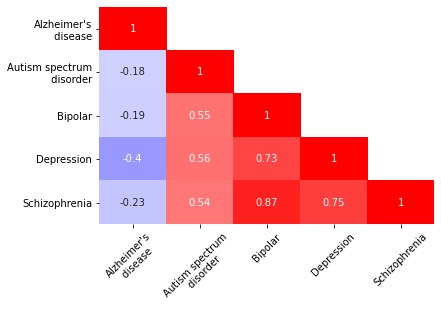

In [28]:
disease_group_dict = {
    "Schizophrenia":['SCZ_PGC3_2020'],
    "Alzheimer's\n disease":['AD_JANSENS2019'],
    "Bipolar":['BIP_PGC3'],
    "Depression":['PGC_depression2019'],
    "Autism spectrum\n disorder":['ASD_2019'],
}
inv_disease_group_dict = {v[0]:k for k,v in disease_group_dict.items()}
disease_values = "|".join([v[0] for v in disease_group_dict.values()])

group_corr_df = corr_df[(corr_df['gwasx'].str.contains(disease_values))& 
                        (corr_df['gwasy'].str.contains(disease_values))].copy()
group_corr_df.replace(inv_disease_group_dict, inplace=True)
all_group_gwas = pd.concat([group_corr_df['gwasx'],group_corr_df['gwasy']]).unique()
diag_df = [[g,g,1,0,m] for g in all_group_gwas for m in methods]
group_corr_df = pd.concat([group_corr_df, pd.DataFrame(diag_df, columns=group_corr_df.columns)])
group_corr_df = group_corr_df.pivot_table(index='gwasx',columns='gwasy',values='corr').T

ax = sns.heatmap(group_corr_df,
                 vmin=-1, vmax=1,
                 annot=True,
                 cmap='bwr',
                 cbar=False,
                )
ax.set_xlabel('')
ax.set_ylabel('')
plt.xticks(rotation=45)
plt.savefig(f"{figure_dir}heatmap_corr_diseases_mean.png", dpi=200, bbox_inches='tight')

In [16]:
group_corr_df.replace(inv_disease_group_dict)

,gwasx,gwasy,corr,pval,method
0,AD_JANSENS2019,ASD_2019,-0.220065,2.278355e-07,H-MAGMA
1,AD_JANSENS2019,BIP_PGC3,-0.122407,4.318468e-03,H-MAGMA
419,AD_JANSENS2019,PGC_depression2019,-0.437015,1.097539e-26,H-MAGMA
422,AD_JANSENS2019,SCZ_PGC3_2020,-0.165602,1.073984e-04,H-MAGMA
536,ASD_2019,BIP_PGC3,0.524345,1.303745e-39,H-MAGMA
954,ASD_2019,PGC_depression2019,0.552502,1.212754e-44,H-MAGMA
957,ASD_2019,SCZ_PGC3_2020,0.523282,1.977269e-39,H-MAGMA
1488,BIP_PGC3,PGC_depression2019,0.680744,5.066567e-75,H-MAGMA
1491,BIP_PGC3,SCZ_PGC3_2020,0.870584,1.844288e-168,H-MAGMA
137132,PGC_depression2019,SCZ_PGC3_2020,0.726869,3.576903e-90,H-MAGMA


## Figure 10

In [ ]:
gwas_group_dict

In [ ]:
sign_threshold = 2
pattern = [v for values in gwas_group_dict.values() for v in values]
pattern = "|".join(pattern)
pivot_corr_df = corr_df.pivot(index=['gwasx','gwasy'],columns='method')
# circosplot.get_gwas_links
links = pivot_corr_df['corr'].mean(axis=1).reset_index().rename(columns={0:'corr'}).copy() 
# only get corr if in gwas_group_dict
links = links[links[['gwasx','gwasy']].apply(lambda x: x.str.contains(pattern)).all(axis=1)] 
nodes = pd.concat([links['gwasx'], links['gwasy']]).drop_duplicates().to_list()
pthres = (0.05/(corr_df.shape[0]/len(constants.METHODS))) # bonferroni
sign_index = pivot_corr_df['pval'][
#         pivot_corr_df['pval'] < calculate_beta_correlation.get_pthres(corr_df)
    pivot_corr_df['pval'] < pthres
].dropna(thresh=sign_threshold).index # only keep correlations significant in at least 2 methods
links.set_index(['gwasx','gwasy'], inplace=True)
sign_links = links[links.index.isin(sign_index)].reset_index()

In [ ]:
pivot_corr_df['pval'][
#         pivot_corr_df['pval'] < calculate_beta_correlation.get_pthres(corr_df)
    pivot_corr_df['pval'] < pthres
].dropna(thresh=3).index

In [ ]:
circosplot.plot(corr_df, gwas_group_dict, gwas_name=None, #if None it will not plot the outer circles
                sign_threshold=len(methods), # for the inner chordplot
                ylim=1250,
                save=False)

## Figure 11

In [ ]:
plt.style.use('default')
fig, ax = plt.subplots(1,1, figsize=(12,12))
es_copy = es_corr_df.copy()
all_ct = pd.concat([es_copy['celltypex'],es_copy['celltypey']]).unique()
diag_df = [[g,g,1,0,0] for g in all_ct]
es_copy = es_copy.append(pd.DataFrame(diag_df, columns=es_copy.columns))

pthres = 0.05 
es_copy.loc[es_copy['pval_bonferroni']>pthres, 'corr'] = 0
es_copy = es_copy.pivot(index='celltypex', columns='celltypey', values='corr').T
sns.heatmap(es_copy,
            vmin=-1, vmax=1,
            cmap='bwr',
            cbar=False,
            ax=ax
            )
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
yticks = es_copy.index.str.split(', ').str[0]
ticks = get_ticks(yticks,ax)
ax.set_yticks(list(range(0,es_copy.shape[0])))
ax.set_yticklabels(ticks)
ax.set_xticks(list(range(0,es_copy.shape[0])))
ax.set_xticklabels(ticks)
ax.set_ylabel('')
ax.set_xlabel('')
plt.savefig(f"{figure_dir}heatmap_escorr_all_datasets.png", dpi=200, bbox_inches='tight')
plt.show()
# plt.tight_layout()

In [ ]:
# mean corr within/between datasets
es_copy = es_corr_df.copy()
es_copy['celltypex'] = es_copy['celltypex'].str.split(', ').str[0]
es_copy['celltypey'] = es_copy['celltypey'].str.split(', ').str[0]
es_copy = es_copy.groupby(['celltypex','celltypey']).mean().reset_index().pivot(
    index='celltypex', columns='celltypey', values='corr')

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(es_copy.T,
            vmin=-1, vmax=1,
            annot=True,
            cmap='bwr',
            ax=ax,
            cbar=False,
           )
ax.set_xlabel('')
ax.set_ylabel('')
plt.savefig(f"{figure_dir}heatmap_escorr_all_datasets_mean.png", dpi=200, bbox_inches='tight')
plt.show()

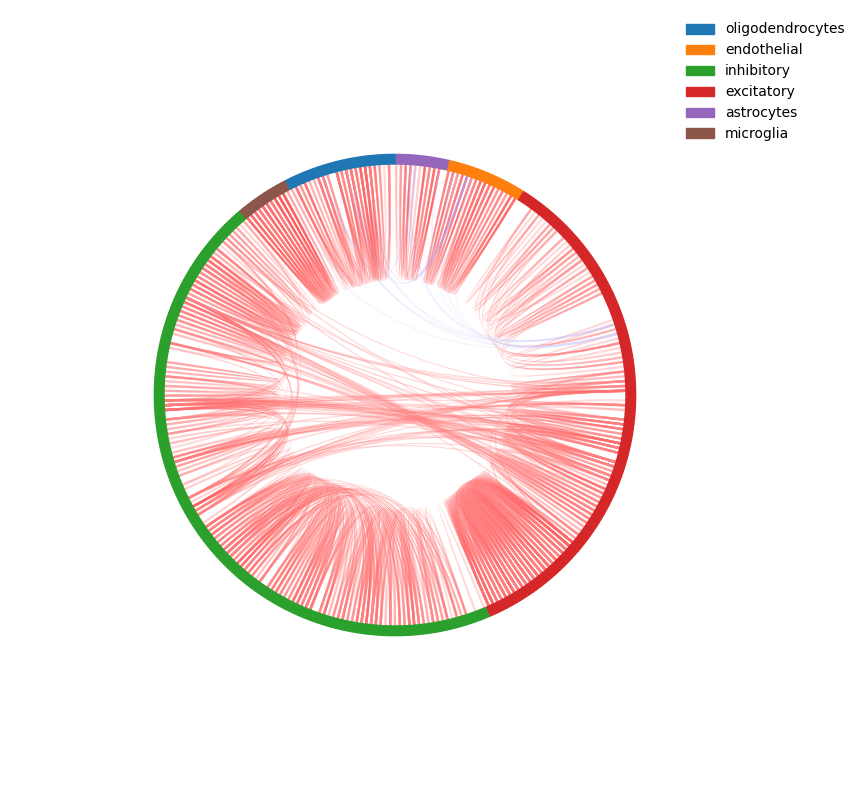

In [75]:
def chord_plot_pandas(gcircle, row, group_dict, corr_limit,bottom):
    if row['corr'] >= corr_limit[1] or row['corr'] <= corr_limit[0]:
        nodes = []
        for i in ['x','y']:
            node = row[f"celltype{i}"]
            for k,v in group_dict.items():
                if bool(re.search(v,node)):
                    node = f"{k}, {node}"
            nodes.append(node)
        gcircle.chord_plot([nodes[0],0,0,bottom],[nodes[1],0,0,bottom],color=cmap(norm(row['corr'])),alpha=.3)


from matplotlib import cm
from scripts.pyCircos import Gcircle
import matplotlib.patches as mpatches
import re

celltype_dict = {
    'oligodendrocytes': 'ODC|ligo|OPC|[MF]OL\d+',
    'endothelial':'endothelial|END|Endo',
    'inhibitory': '[Gg][Aa][Bb][Aa]|In[0-9]|INH',
    'excitatory': '[Gg][Ll][Uu]|[Ee][Xx][a-zA-Z0-9]',
    'astrocytes': '[Aa]stro| ASC',
    'microglia': '[Mm]icro|MG'
}
color_map = 'tab10'
bottom = 1200
figsize = (10,10)
ylim = 2000
# corr_limit = (0,0)
q = 95
filename = f'{figure_dir}circosplot_es_gene_corr_{q}.png'

pattern = "|".join([v for v in celltype_dict.values()])
links = es_corr_df[
    (es_corr_df['celltypex'].str.contains(pattern))
    &
    (es_corr_df['celltypey'].str.contains(pattern)) 
    &
    (es_corr_df['pval_bonferroni']<=0.05)
]
nodes = pd.concat([links['celltypex'], links['celltypey']]).drop_duplicates().to_list()
nodes = sorted([f"{k}, {n}"  for n in nodes for k,v in celltype_dict.items() if re.search(v,n)])
corrs = links['corr']
corr_limit = (corrs[corrs<0].quantile(q/100),corrs[corrs>0].quantile(q/100))
plt.style.use('default')
cmap = cm.get_cmap('bwr')
norm = plt.Normalize(-1, 1)
cmap_group = {group_name:cm.get_cmap(color_map)(i) for i,group_name in enumerate(celltype_dict.keys())}
gcircle = Gcircle()
for node in nodes:
    for k,v in celltype_dict.items():
        if re.search(v,node):
            gcircle.add_locus(node, 2,
                              bottom=bottom,
                              linewidth=1, interspace=0,
                              facecolor=cmap_group[k],
                              edgecolor=cmap_group[k])

gcircle.set_locus(figsize=figsize) #Create figure object
gcircle.ax.set_ylim(0,ylim)
# make chords inside the circle
links.apply(lambda row: chord_plot_pandas(gcircle, row, celltype_dict, corr_limit, bottom), axis=1)
# add legend
patches = [mpatches.Patch(color=v, label=k) for k,v in cmap_group.items()]
gcircle.ax.legend(handles=patches, bbox_to_anchor=(1.1, 1), loc=1, frameon=False)
plt.savefig(filename, dpi=150, bbox_inches='tight')

In [112]:
original_nodes = pd.concat([links['celltypex'], links['celltypey']]).drop_duplicates().to_list()
df_list = []
for dataset in df_all.specificity_id.unique().tolist():
    cellex_file = f'esmu/{dataset}.mu.csv' # change esmu to mu if file not found
    if Path(cellex_file).is_file():
        df_esmu = pd.read_csv(cellex_file, index_col=0)
    elif Path(cellex_file.replace('.mu','.esmu')).is_file():
        df_esmu = pd.read_csv(cellex_file.replace('.mu','.esmu'), index_col=0)
    else:
        print('file not found')
    df_esmu.columns = [f'{dataset}, {ct}' for ct in df_esmu.columns]
    df_esmu = df_esmu[df_esmu.columns.intersection(original_nodes)]
    df_list.append(df_esmu)

merged_es_df = pd.concat(df_list, join='outer', axis=1)
merged_es_df.sort_index(axis=1, inplace=True)
merged_es_df.dropna(axis=0, how='all', inplace=True)
merged_es_df

,"Allen_human_LGN, GABAergic.LGN_Inh_CTXN3","Allen_human_LGN, GABAergic.LGN_Inh_LAMP5","Allen_human_LGN, GABAergic.LGN_Inh_NTRK1","Allen_human_LGN, GABAergic.LGN_Inh_TRPC4","Allen_human_LGN, Glutamatergic.LGN_Exc_BTNL9","Allen_human_LGN, Glutamatergic.LGN_Exc_PRKCG_BCHE","Allen_human_LGN, Glutamatergic.LGN_Exc_PRKCG_GRB14","Allen_human_LGN, Non-Neuronal.Astro_CPAMD8","Allen_human_LGN, Non-Neuronal.Astro_LGR6","Allen_human_LGN, Non-Neuronal.Micro_C1QB",...,"tabula_muris, Brain_Non-Myeloid.oligodendrocyte_precursor_cell","tabula_muris, Fat.endothelial_cell","tabula_muris, Heart.endothelial_cell","tabula_muris, Kidney.endothelial_cell","tabula_muris, Limb_Muscle.endothelial_cell","tabula_muris, Liver.endothelial_cell_of_hepatic_sinusoid","tabula_muris, Lung.lung_endothelial_cell","tabula_muris, Mammary_Gland.endothelial_cell","tabula_muris, Pancreas.endothelial_cell","tabula_muris, Trachea.endothelial_cell"
gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000121410,0.0,0.445792,0.000000,0.000000,0.0,0.000000,0.178244,0.000000,0.000000,0.000000,...,0.000000,0.127384,0.176207,0.0,0.003823,0.0,0.000000,0.000000,0.000000,0.0
ENSG00000175899,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.463363,...,0.000000,0.000000,0.034852,0.0,0.000000,0.0,0.158642,0.000000,0.000000,0.0
ENSG00000166535,0.0,0.000000,0.059693,0.060238,0.0,0.000000,0.000000,0.242682,0.108649,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENSG00000128274,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.641329,0.000000,0.000000,...,0.000000,0.647865,0.000000,0.0,0.000000,0.0,0.615768,0.599262,0.000000,0.0
ENSG00000094914,0.0,0.000000,0.000000,0.000000,0.0,0.010904,0.000000,0.000000,0.028909,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000213588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
ENSG00000083817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.350117,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.053197,0.0
ENSG00000167625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [ ]:
# es corr for all 'ct' celltypes

celltype_dict = {
    'oligodendrocytes': 'ODC|ligo',
    'endothelial':'endothelial|END|Endo',
    'inhibitory': '[Gg][Aa][Bb][Aa]|In[0-9]|INH',
    'excitatory': '[Gg][Ll][Uu]|[Ee][Xx][a-zA-Z0-9]',
    'astrocytes': '[Aa]stro| ASC'
}


for ct_name, ct in celltype_dict.items():
    es_type = es_corr_df[
        (es_corr_df['celltypex'].str.contains(ct))
        &
        (es_corr_df['celltypey'].str.contains(ct))
    ].copy()
    type_ct = pd.concat([es_type['celltypex'],es_type['celltypey']]).unique()
    diag_df = [[x,x,1,0,0] for x in type_ct]
    es_type = es_type.append(pd.DataFrame(diag_df, columns=es_type.columns))
    es_type.loc[es_type['pval_bonferroni']>pthres, 'corr'] = 0
    # es_pval = es_type.pivot(index='celltypex', columns='celltypey', values='pval_bonferroni')
    es_type = es_type.pivot(index='celltypex', columns='celltypey', values='corr')

    fig, ax = plt.subplots(figsize=(9,9))
    # annot = (es_pval < 0.05).T.replace({True:'*', False:''})
    # # if es_type.shape[0] > 20:
    # #     annot = False 
    sns.heatmap(es_type.T,
                vmin=-1, vmax=1,
    #             annot=True,
    #             fmt = '',
    #             annot_kws={"size": 10},
                cmap='bwr',
                ax=ax,
                cbar=False,
               )
    ax.set_xlabel('')
    ax.set_ylabel('')
#     xticks = ax.get_xticklabels()
#     for txt in xticks:
#         txt.set_text(txt.get_text().replace(', ','\n').replace('.','\n')
# #                      .replace('-','\n')
#                     )    
#     ax.set_xticklabels(xticks,rotation=45)
#     plt.savefig(f"{figure_dir}heatmap_escorr_{ct_name}.png", dpi=200, bbox_inches='tight')
    plt.show()
#     break


In [ ]:
ct = 'Pancreas.pancreatic_A_cell'
es_copy = es_corr_df[
    (es_corr_df['celltypex'].str.contains(ct))
    |
    (es_corr_df['celltypey'].str.contains(ct))
].copy()
# es_copy[es_copy['pval_bonferroni']<=0.05].sort_values('corr')
es_copy[es_copy['pval']<=(0.05/es_corr_df.shape[0])].sort_values('corr')

In [ ]:
nodes = pd.concat([es_corr_df['celltypex'],es_corr_df['celltypey']]).unique()
all_datasets = pd.concat([es_corr_df['celltypex'],es_corr_df['celltypey']]).str.split(', ').str[0].unique()
all_datasets

In [ ]:
from matplotlib import cm
import re

links = es_corr_df.copy()
links.set_index(['celltypex','celltypey'], inplace=True)
  sign_index = links[
    links['pval_bonferroni'] <= 0.05
].index
links = links[links.index.isin(sign_index)].reset_index()

color_map = 'tab10'
bottom = 1200
figsize = (10,10)
ylim = 1250
plt.style.use('default')
cmap = cm.get_cmap('coolwarm')
norm = plt.Normalize(-1, 1)
cmap_group = {group_name:cm.get_cmap(color_map)(i) for i,group_name in enumerate(all_datasets)}

gcircle = circosplot.Gcircle()
for node in nodes:
    for d in all_datasets:
        if re.search(d,node):
            gcircle.add_locus(f"{node}", 2,
                              bottom=bottom,
                              linewidth=1, interspace=0, 
                              facecolor=cmap_group[d],
                              edgecolor=cmap_group[d])
gcircle.set_locus(figsize=figsize) #Create figure object
gcircle.ax.set_ylim(0,ylim)
# make chords inside the circle
links.apply(lambda row: 
            gcircle.chord_plot([row["celltypex"],0,0,bottom],
                               [row["celltypey"],0,0,bottom],
                               color=cmap(norm(row['corr'])),alpha=.3), axis=1)

In [ ]:
links[links['corr']>0].sort_values('corr')

In [ ]:
es_corr_df[(es_corr_df['pval_bonferroni']<=.05)
           &
           (es_corr_df['corr']>0)
          ].sort_values('corr')

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(es_corr_df['corr'].values, es_corr_df['pval_bonferroni'].values, s=1)
ax.axhline(0.05,color='r')
ax.set_xlabel('corr')
ax.set_ylabel('pval_bonferroni')
plt.show()

In [ ]:
df_list = []
for dataset in all_datasets:
    cellex_file = f'esmu/{dataset}.mu.csv' # change esmu to mu if file not found
    if Path(cellex_file).is_file():
        df_esmu = pd.read_csv(cellex_file, index_col=0)
    elif Path(cellex_file.replace('.mu','.esmu')).is_file():
        df_esmu = pd.read_csv(cellex_file.replace('.mu','.esmu'), index_col=0)
    else:
        print('file not found')
    df_esmu.columns = [f'{dataset}, {ct}' for ct in df_esmu.columns]
    df_list.append(df_esmu)
merged_es_df = pd.concat(df_list, join='outer', axis=1)
merged_es_df.sort_index(axis=1, inplace=True)

In [ ]:
from scipy.stats import kendalltau
from scipy.stats import spearmanr

import itertools

dataframe = merged_es_df.copy()
corr_list = []
n_list = []
for x,y in itertools.combinations(dataframe.columns, 2):
    corr_frame = dataframe.loc[:,[x,y]].fillna(0).copy()
    corr_frame = corr_frame[(corr_frame>0).all(1)]
    corr, pval = spearmanr(corr_frame.iloc[:,0].values, corr_frame.iloc[:,1].values)
#     break
    corr_list.append([x,y,corr, pval])
    n_list.append([len(corr_frame),corr,pval, corr_frame])
es_corr_df_spearman = pd.DataFrame(corr_list, columns=['celltypex','celltypey','corr','pval'])

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(10,7))
for ax,v in zip(axes.flatten(),['corr','pval']):
    ax.scatter(es_corr_df[v].values, es_corr_df_spearman[v].values, s=1)
    ax.set_xlabel(f'Kendall Tau {v}')
    ax.set_ylabel(f'Spearman {v}')
    ax.axline((0,0),(1,1),color='k')
plt.show()

In [ ]:
t = 500
n_cor = [n[1] for n in n_list if n[0]<t]
n_pval = [n[2]*len(n_list) for n in n_list if n[0]<t] 
n_pval = [1 if n>1 else n for n in n_pval]
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(n_cor, n_pval, s=1)
ax.axhline(0.05,color='r')
ax.set_xlabel('corr')
ax.set_ylabel('pval')
plt.show()
print(f"Minimum significant corr = {min([abs(c) for c,p in zip(n_cor,n_pval) if p<=0.05])}")

In [ ]:
from statsmodels.stats.multitest import multipletests
import numpy as np

temp = corr_df.copy()
# display(temp)
temp['pval'] = multipletests(temp['pval'].values, method='bonferroni')[1]
temp = temp[(temp['pval']<=0.05)
     &(temp['corr']<0)
    ].sort_values('corr').groupby(['gwasx','gwasy']).agg(list)

temp['N_method'] = temp['method'].apply(lambda row: len(row))
temp['mean_corr'] = temp['corr'].apply(lambda row: np.mean(row))
display(temp[temp['N_method']>2].reset_index().drop(columns='pval').sort_values('mean_corr'))
# temp[temp['corr'] < 0] = 0
# temp.hist(bins=100)

temp_list = temp[temp['N_method']>2].reset_index().drop(columns='pval').sort_values('mean_corr')[['gwasx','gwasy']].values.tolist()

In [ ]:
def make_name(string):
    return string.replace(':','_')

In [ ]:
# scatter plot of GWAS 'a' and with all other significant correlated GWASes ('b')
from adjustText import adjust_text
methods = constants.METHODS
method_color = {'H-MAGMA':'#4A148C',
                'LDSC':'#CE93D8',
                'MAGMA':'#9C27B0'}
pval_correction = constants.PVAL_CORRECTION
plot_annots = True
plt.style.use('seaborn')
tot_i = len(temp_list)*len(methods)
i = 1
for a,b in temp_list:
    for m in methods:
        print(f"{i}/{tot_i}")
        i += 1
        plot_name = f'{figure_dir}scatter_plots/{make_name(a)}_{make_name(b)}_{m}.png'
        if not os.path.exists(plot_name):
            fig, ax = plt.subplots(figsize=(7,7))
            cy = 'blue'
            cx = 'red'
            ax.axhline(0, color='white', zorder=0, lw=3)
            ax.axvline(0, color='white', zorder=0, lw=3)
    #         ax.axline(xy1=(0,0), slope=-1, color='white', zorder=0, lw=3)
            x,y = [df_all[(df_all.gwas==j)&(df_all.method==m).copy()]
                   for j in [a,b]]
            ax.scatter(x.beta, y.beta, label=m, color=method_color[m], alpha=.4)

            x = x.assign(sign = lambda x: (x[f'pvalue_{pval_correction}'] <= 0.05))
            y = y.assign(sign = lambda x: (x[f'pvalue_{pval_correction}'] <= 0.05))
            #             x['sign'] = (x[f'pvalue_{pval_correction}'] <= 0.05)
            #             y['sign'] = (y[f'pvalue_{pval_correction}'] <= 0.05)

            # is really slow because of the annotations
            if plot_annots:
                texts_xy = [ax.annotate(annot, (x.beta.iat[l], y.beta.iat[l]),color='green',fontsize=8)
                         for l,annot in enumerate(x.annotation) if x.sign.iat[l] and y.sign.iat[l]]
                texts_x = [ax.annotate(annot, (x.beta.iat[l], y.beta.iat[l]),color=cx,fontsize=8)
                         for l,annot in enumerate(x.annotation) if x.sign.iat[l] and not y.sign.iat[l] ]
                texts_y = [ax.annotate(annot, (x.beta.iat[l], y.beta.iat[l]),color=cy,fontsize=8)
                         for l,annot in enumerate(y.annotation) if y.sign.iat[l] and not x.sign.iat[l] ]
                adjust_text(texts_xy+texts_x+texts_y, lim=100, arrowprops=dict(arrowstyle='->', color='black'))

            # print(f'Plot {i+1}/{len(b_list)}...')
            plt.title(m)

            ax.set_xlabel(a, fontsize=10, color=cx)
            ax.set_ylabel(b, fontsize=10, color=cy)

            corr_val = corr_df[(((corr_df['gwasx']==a)&(corr_df['gwasy']==b))
                               |
                               ((corr_df['gwasx']==b)&(corr_df['gwasy']==a)))
                               &
                               (corr_df['method']==m)
                              ]['corr'].values
            ax.text(0.12, 0.97, f'Cell-type Correlation  = {float(corr_val):.2f}', horizontalalignment='center',
                 verticalalignment='center', transform = ax.transAxes, size=7)
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            min_value = min(min(x.beta),min(y.beta)) * 1.1
            max_value = max(max(x.beta),max(y.beta)) * 1.1
            ax.set_ylim(min_value,max_value)
            ax.set_xlim(min_value,max_value)
            # Path(f"{out_dir}correlation_{make_filename(a)}").mkdir(parents=True, exist_ok=True)
            plt.savefig(plot_name,
                        dpi=200, bbox_inches='tight')
    #         plt.show()
            plt.close(fig)
    #         break
    #     break

In [ ]:
for gwas_group,keywords in gwas_group_dict.items():
    regex_keywords = '|'.join(keywords)
    df_group = df_all[df_all['gwas'].str.contains(regex_keywords)]
    df_group_sign = df_group[(df_group[f"pvalue_{pval_correction}"]<0.05)]
    display(df_group_sign)
    break
